## News Mood

* We observed that most news sources fall within the compound score of 0, with fairly frequent outliers throughout.
* No news sources tends to write more _emotional_ tweets than others.
* CBS News & Fox News tend to write more negative tweets, while BBC and CNN tend to wrtie more positive tweets. Though the difference is not large, BBC's mean is ~0.1 polarity and Fox News's is ~ -0.03.

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret,
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
now =datetime.now()

In [3]:
targets = ["BBCNews", "CBSNews", "CNN", "FoxNews", "nytimes"]

target_tweets_df = pd.DataFrame(columns = ["User","Text","Tweets Ago","Compound Score","Positive Score","Neutral Score","Negative Score"])

target_tweets_df.head()

,User,Text,Tweets Ago,Compound Score,Positive Score,Neutral Score,Negative Score


In [4]:
index = 0

for user in targets:
    counter = 0
    oldest_tweet = None
    for x in range(5):
        public_tweets = api.user_timeline(user, max_id=oldest_tweet)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            text = tweet["text"]
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            
            target_tweets_df.at[index,"User"] = user
            target_tweets_df.at[index,"Text"] = text
            target_tweets_df.at[index, "Tweets Ago"] = tweets_ago
            target_tweets_df.at[index,"Compound Score"] = compound
            target_tweets_df.at[index, "Positive Score"] = pos
            target_tweets_df.at[index, "Neutral Score"] = neu
            target_tweets_df.at[index, "Negative Score"] = neg
            oldest_tweet = tweet["id"]-1
            
            counter += 1
            index += 1

In [6]:
target_tweets_df.to_csv("target_tweets.csv")

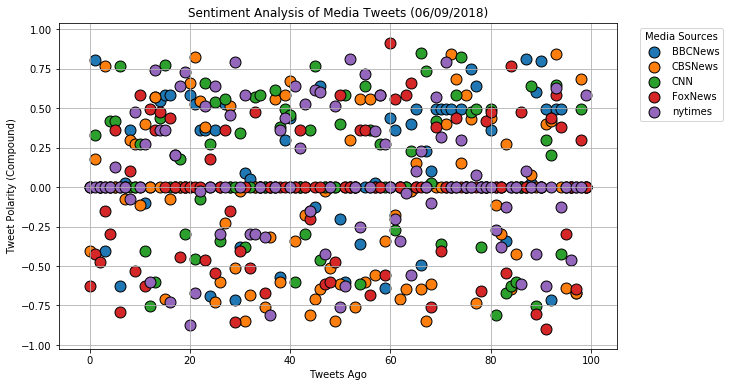

In [11]:
fig = plt.figure(figsize= (10,6))
plt.title(f"Sentiment Analysis of Media Tweets ({now.strftime('%m/%d/%Y')})")
for user in targets:
    mask_df = target_tweets_df[target_tweets_df["User"]== user]
    plt.scatter(mask_df["Tweets Ago"], mask_df["Compound Score"], marker="o",label = user,s=120, edgecolors="black")
    plt.legend(loc= 'upper right', bbox_to_anchor=(1.2,1), title="Media Sources")
plt.grid()
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity (Compound)")
plt.savefig("Scatterplot_Sentiment.png", bbox_inches="tight")
plt.show()

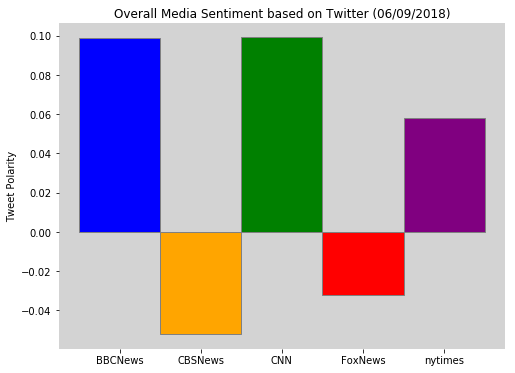

In [38]:
mean_sentiments = []
colors =["b","orange","g","r","purple"]
for user in targets:
    mask_df = target_tweets_df[target_tweets_df["User"]== user]
    avg_compound = mask_df["Compound Score"].mean()
    mean_sentiments.append(avg_compound)

fig, ax = plt.subplots(figsize=(8,6))    
ax.set_facecolor("#D3D3D3")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)    
    
plt.title(f"Overall Media Sentiment based on Twitter ({now.strftime('%m/%d/%Y')})")
plt.bar(targets, mean_sentiments, color=colors,align="center",width=1,edgecolor="grey")
plt.ylabel("Tweet Polarity")

plt.savefig("Mean_Media_Sentiment.png")
plt.show()